In [54]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [55]:
data= pd.DataFrame(pd.read_csv('car_data.csv'))

In [56]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [57]:
data.drop('User ID',axis=1,inplace=True)

In [58]:
data.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [60]:
data.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [61]:
data.shape

(1000, 4)

In [62]:
data.isna().sum()

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

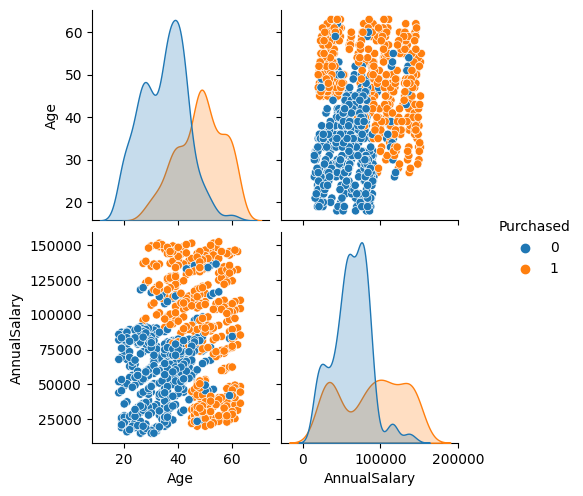

In [63]:
sns.pairplot(data,hue='Purchased')

<AxesSubplot:>

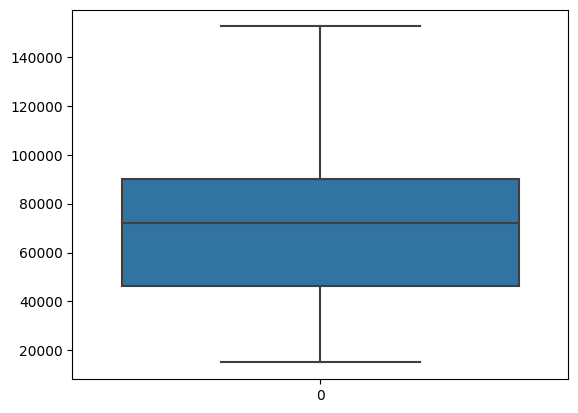

In [64]:
sns.boxplot(data=data['AnnualSalary'])

<AxesSubplot:>

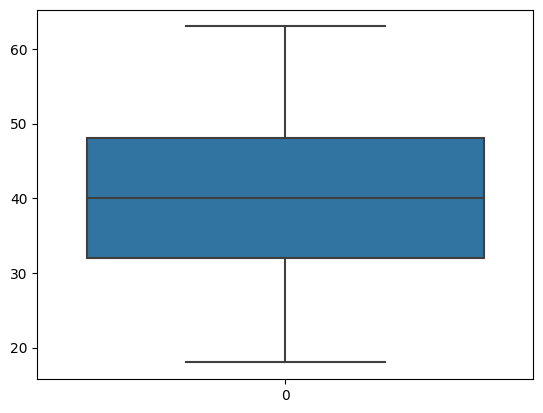

In [65]:
sns.boxplot(data=data['Age'])

In [66]:
data.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [67]:
data_encoded = pd.get_dummies(data,drop_first=True)

In [68]:
data_encoded.head()

,Age,AnnualSalary,Purchased,Gender_Male
0,35,20000,0,1
1,40,43500,0,1
2,49,74000,0,1
3,40,107500,1,1
4,25,79000,0,1


In [69]:

scale = StandardScaler()
data_encoded['Age_scaled'] = scale.fit_transform(data_encoded[['Age']])
data_encoded['Salary_scaled'] = scale.fit_transform(data_encoded[['AnnualSalary']])

In [70]:
final_data = data_encoded.drop(['Age','AnnualSalary'],axis=1)

In [71]:
final_data

,Purchased,Gender_Male,Age_scaled,Salary_scaled
0,0,1,-0.477120,-1.528498
1,0,1,-0.009905,-0.846767
2,0,1,0.831082,0.038032
3,1,1,-0.009905,1.009861
4,0,1,-1.411549,0.183081
...,...,...,...,...
995,0,1,-0.196791,-0.397115
996,0,0,0.644196,-1.426964
997,1,0,-1.131220,1.909165
998,1,0,0.737639,1.778621


In [72]:
input_data = final_data.loc[:,['Gender_Male','Age_scaled','Salary_scaled']]
output_data = final_data.loc[:,'Purchased']

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(input_data.values,output_data,test_size=0.25,random_state=1)
clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=1)
clf.fit(X_train,y_train)

predict = clf.predict(X_test)
print(accuracy_score(y_test,predict))


0.904


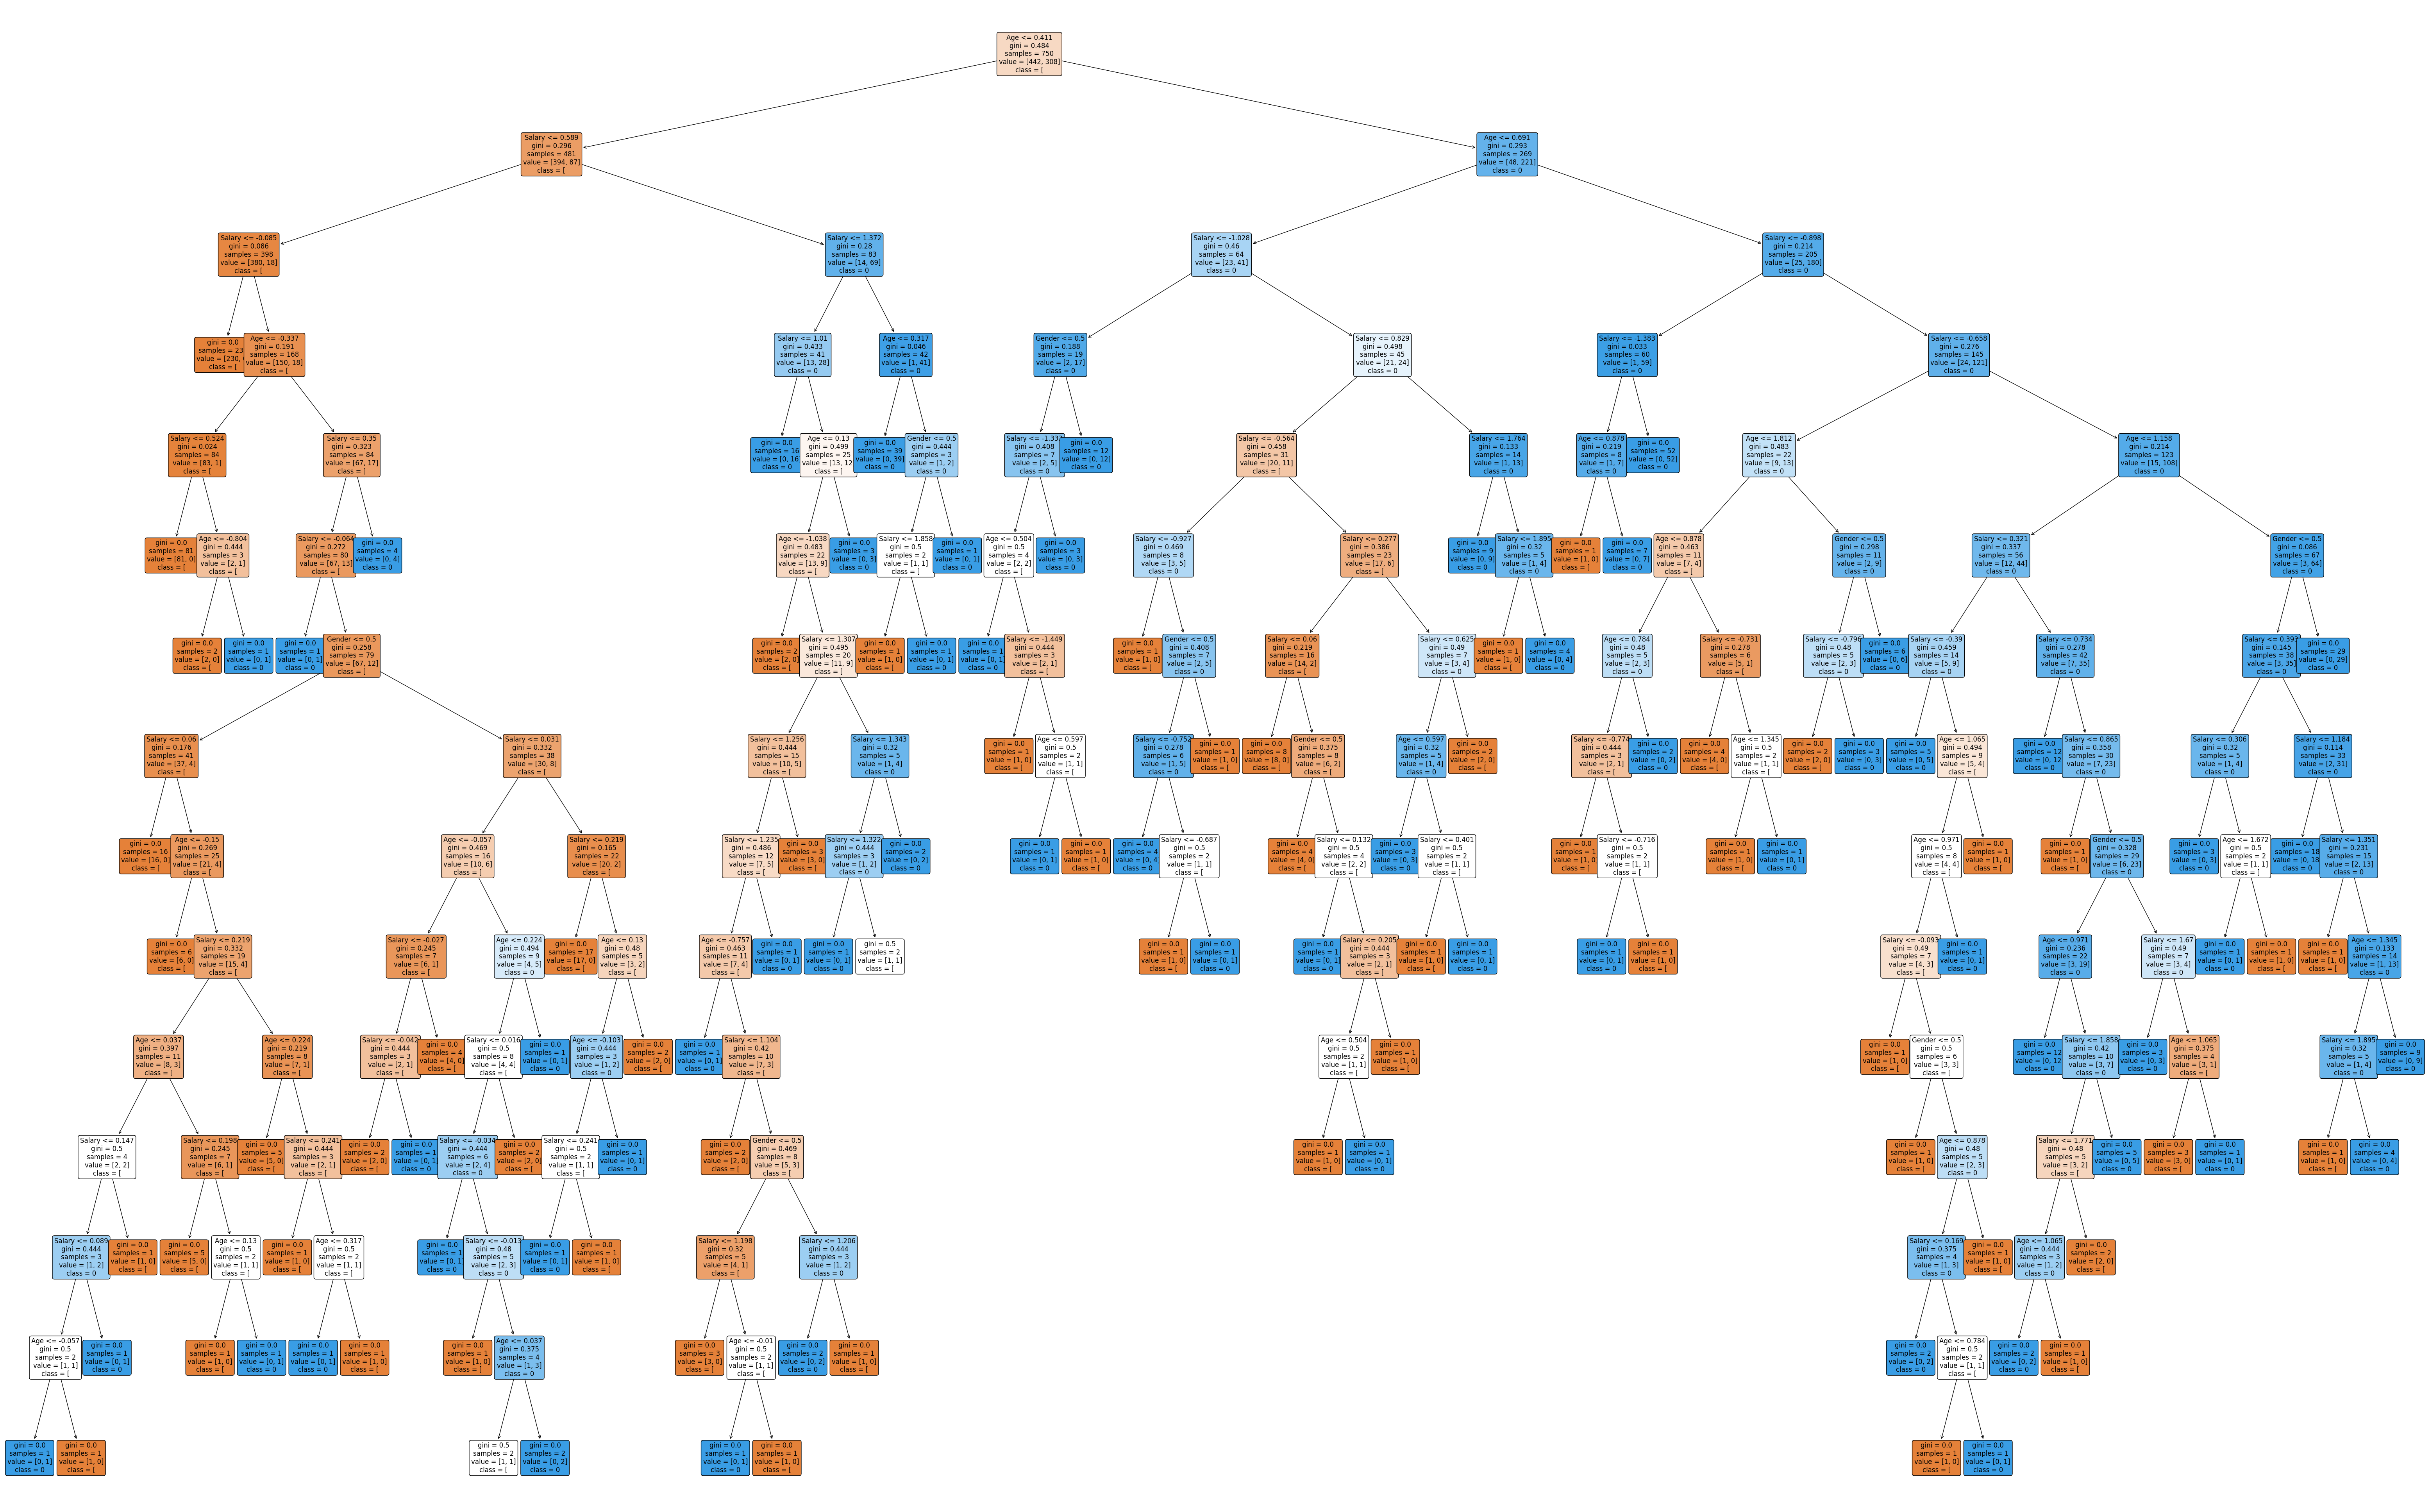

In [74]:
from sklearn import tree
import matplotlib.pyplot as plt

labels = output_data.unique()
plt.figure(figsize=(80,50))
a = tree.plot_tree(clf,feature_names=['Gender','Age','Salary'],class_names=str(labels),rounded=True,filled=True,fontsize=12)
plt.show()

In [98]:
from sklearn.ensemble import RandomForestClassifier

accuracy_list = {}
for i in range(1,100):
    forest_clf = RandomForestClassifier(n_estimators = i,criterion = 'entropy')

    forest_clf.fit(X_train,y_train)
    y_pred = forest_clf.predict(X_test)

    from sklearn import metrics
    accuracy_val = metrics.accuracy_score(y_test,y_pred)
    accuracy_list[i] = accuracy_val

max_value = max(accuracy_list,key=accuracy_list.get)
print(max_value,accuracy_list[max_value])

8 0.944


In [99]:
random_forest_clf = RandomForestClassifier(n_estimators = 8)
random_forest_clf.fit(X_train,y_train)
y_predict = random_forest_clf.predict(X_test)

from sklearn import metrics
accuracy_value = metrics.accuracy_score(y_test,y_predict)
print(accuracy_value)

0.932
